# O que é o Pandas e para que serve

- Análise de Dados (seja para DataScience, seja para trabalhar de forma integrada com arquivos em Excel e Banco de Dados)
- Melhor biblioteca/módulo para trabalhar com quantidades enormes de informações
- Uma mistura de listas e dicionários de forma muito eficiente

## Resumo

Se você trabalha com muitos dados, você vai precisar usar o pandas

## Forma de usar

In [2]:
import pandas as pd

produto_df = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\GitHub\Cursos\Python\arquivos\Contoso - Cadastro Produtos.csv", encoding="ISO-8859-1", sep=';')

produto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ÿNome do Produto      1690 non-null   object
 1   Descricao do Produto  1690 non-null   object
 2   Fabricante            1690 non-null   object
 3   Nome da Marca         1690 non-null   object
 4   Tipo                  1690 non-null   object
 5   Custo Unitario        1690 non-null   object
 6   Preco Unitario        1690 non-null   object
 7   ID Produto            1690 non-null   int64 
 8   ID Subcategoria       1690 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 119.0+ KB


In [3]:
import pandas as pd

vendas_df = pd.read_csv(r"arquivos\Contoso - Vendas - 2017.csv", sep=';')

vendas_df['ID Cliente']

0          6825
1         18469
2         19730
3         29326
4         22617
          ...  
980637    10353
980638    31750
980639    12003
980640    25550
980641    28707
Name: ID Cliente, Length: 980642, dtype: int64

In [4]:
vendas_df[:3]

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1


In [5]:
vendas_df[['Numero da Venda', 'Data da Venda', 'ID Produto']]

,Numero da Venda,Data da Venda,ID Produto
0,1,01/01/2017,981
1,2,01/01/2017,1586
2,3,01/01/2017,1444
3,4,01/01/2017,1468
4,5,01/01/2017,1106
...,...,...,...
980637,980638,31/12/2017,2490
980638,980639,31/12/2017,2488
980639,980640,31/12/2017,2511
980640,980641,31/12/2017,436


In [6]:
vendas_df['ID Produto'][0]

981

## Aplicações

In [7]:
# Informações da tabela

vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


In [8]:
# Criar uma lista de Clientes

lista_clientes = vendas_df['ID Cliente']

lista_clientes

0          6825
1         18469
2         19730
3         29326
4         22617
          ...  
980637    10353
980638    31750
980639    12003
980640    25550
980641    28707
Name: ID Cliente, Length: 980642, dtype: int64

In [9]:
# Criar uma lista com produto e quantidade, pode ser feito de duas formas:

# lista_produto = ['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']
# produtos_quantidades = vendas_df[lista_produto]

produtos_quantidades = vendas_df[['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']]

produtos_quantidades

,ID Produto,Quantidade Vendida,Quantidade Devolvida
0,981,9,1
1,1586,9,1
2,1444,13,1
3,1468,6,1
4,1106,4,1
...,...,...,...
980637,2490,120,0
980638,2488,120,0
980639,2511,80,0
980640,436,39,0


In [10]:
import pandas as pd

# As vezes precisa mudar o encoding. Possíveis valores para testar:
# encoding = 'Latin1', encoding='ISO-8859-1', encoding='utf-8' ou encoding='cp1252'
produtos_df = pd.read_csv(r'arquivos\Contoso - Cadastro Produtos.csv', encoding="ISO-8859-1", sep=';')
clientes_df = pd.read_csv(r'arquivos\Contoso - Clientes.csv', encoding="ISO-8859-1", sep=';')
lojas_df = pd.read_csv(r'arquivos\Contoso - Lojas.csv', encoding="ISO-8859-1", sep=';')
promocoes_df = pd.read_csv(r'arquivos\Contoso - Promocoes.csv', encoding="ISO-8859-1", sep=';')
vendas_df = pd.read_csv(r"arquivos\Contoso - Vendas - 2017.csv", sep=';')

# Usar o display para ver todos os dataframes
display(produtos_df)
display(clientes_df)
display(lojas_df)
display(promocoes_df)
display(vendas_df)

,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


,ÿID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ÿID Promocao,Nome Promocao,Percentual Desconto,Data Inicio,Data Termino,Unnamed: 5,Unnamed: 6
0,1,Sem desconto,0,01/01/2017,31/12/2020,NaN,NaN
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017,NaN,NaN
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017,NaN,NaN
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017,NaN,NaN
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018,NaN,NaN
5,6,Promoção de Primavera Asiática,"0,2",01/02/2017,30/04/2017,NaN,NaN
6,7,Promoção de Verão Asiático,"0,1",01/05/2017,30/06/2017,NaN,NaN
7,8,Promoção de Primavera Europeia,"0,07",01/02/2017,30/04/2017,NaN,NaN
8,9,Promoção Volta às Aulas Europeias,"0,1",01/08/2017,30/09/2017,NaN,NaN
9,10,Promoção de Férias Europeias,"0,2",01/10/2017,31/01/2018,NaN,NaN


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


In [11]:
# Tirar as colunas inúteis

clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
display(clientes_df)

,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [12]:
# Ou selecionar as colunas que eu quero
produtos_df = produtos_df[['ID Produto', 'ÿNome do Produto']]
lojas_df = lojas_df[['ÿID Loja', 'Nome da Loja']]
clientes_df = clientes_df[['ÿID Cliente', 'E-mail']]
display(clientes_df)

,ÿID Cliente,E-mail
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


In [13]:
# Renomear as colunas
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
display(produtos_df)

lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
display(lojas_df)

clientes_df.columns = clientes_df.columns.str.replace("ÿ", "", regex=False)
display(clientes_df)

,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


,ID Cliente,E-mail
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


In [14]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


In [15]:
# Juntando os dataframes para ter somente UM dataframe
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,E-mail,Nome da Loja
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,rbrumfieldmy@ameblo.jp,Loja Contoso Austin
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,cshawd4@technorati.com,Loja Contoso North America Reseller
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",kgorriekd@bandcamp.com,Loja Contoso Tehran No.2
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,angela49@adventure-works.com,Loja Contoso Singapore
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,jacob4@adventure-works.com,Loja Contoso Grand Prairie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,ocrosson9u@illinois.edu,Loja Contoso Ridgely
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,victor11@adventure-works.com,Loja Contoso Milliken
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,mtopaz4@gmpg.org,Loja Contoso Cheshire
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,lance5@adventure-works.com,Loja Contoso East Troy


E-mail
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail'>

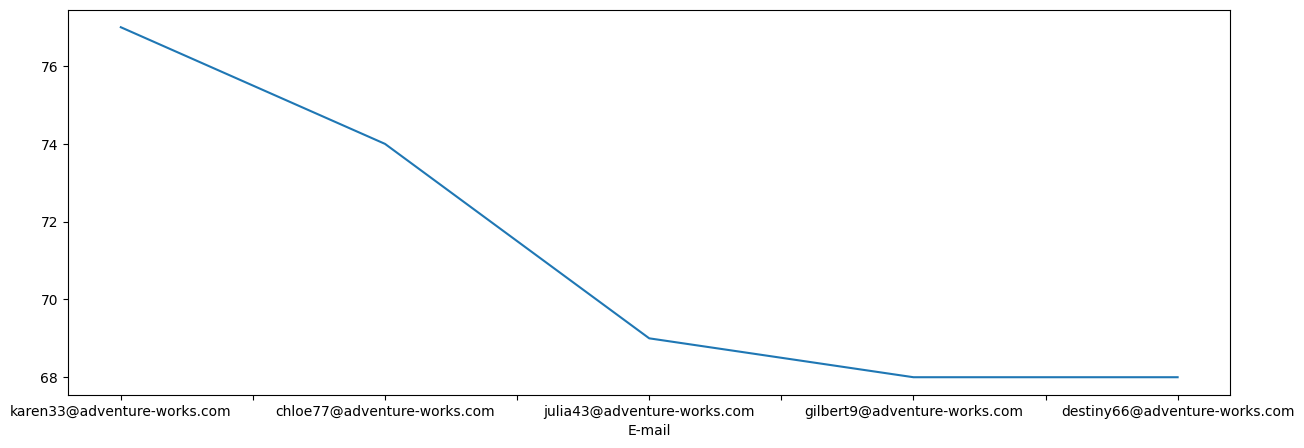

In [16]:
frequencia_clientes = vendas_df['E-mail'].value_counts() # quantidade que aparece
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15,5)) # os primeiros 5 itens

<Axes: xlabel='E-mail'>

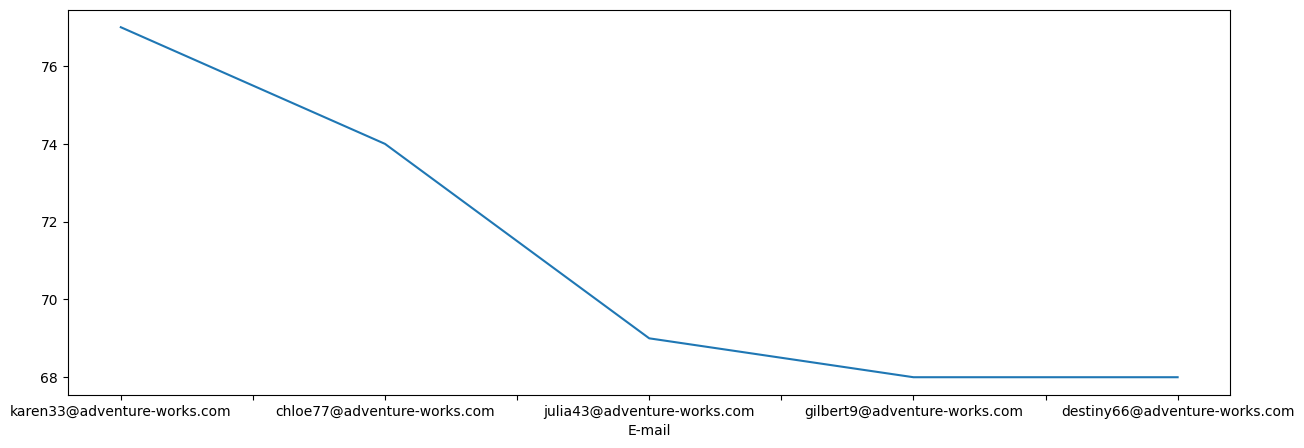

In [20]:
frequencia_clientes[:5].plot(figsize=(15,5), yticks=range(68, 78, 2))

In [23]:
# Agrupando e somando

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


                       Quantidade Vendida
Nome da Loja                             
Loja Contoso Catalog              1029117
                       Quantidade Vendida
Nome da Loja                             
Loja Contoso Venezia                  234


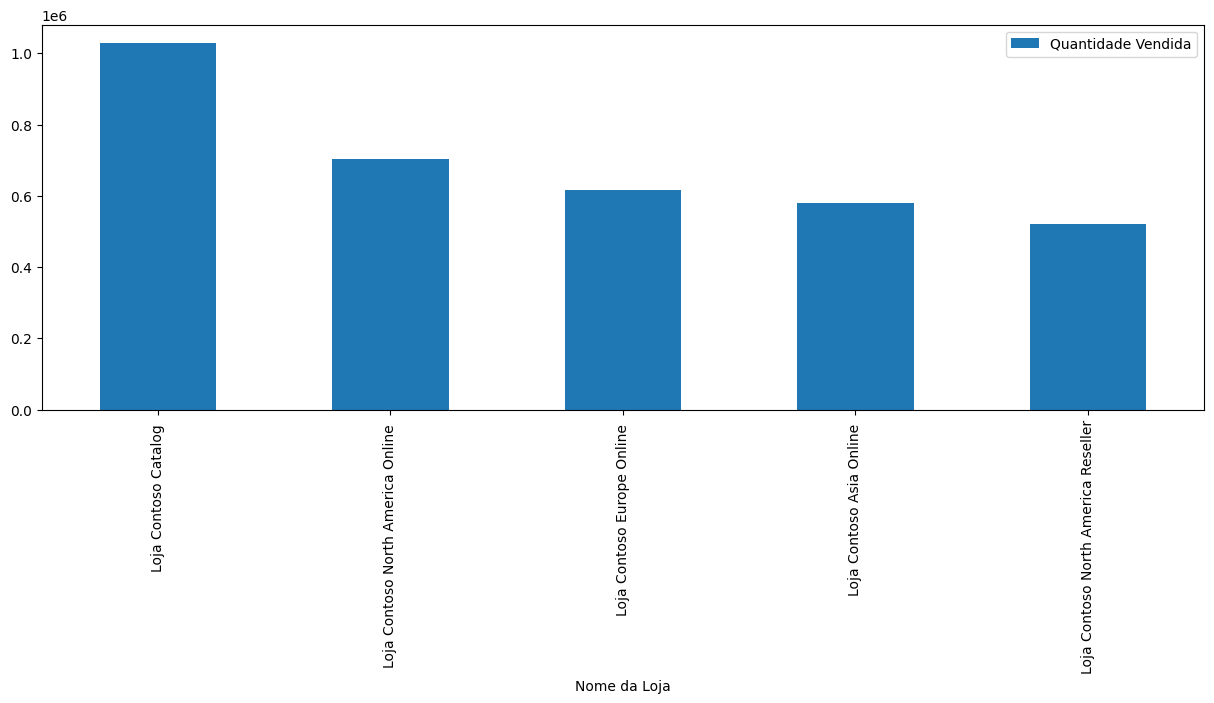

In [ ]:
# ordenar o dataframe
# Ascending - Crescente:True Decrescente:False
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
display(vendas_lojas)
vendas_lojas[:5].plot(figsize=(15,5), kind='bar')
print(vendas_lojas[0:1]) # maior valor
print(vendas_lojas[-1:]) # menor valor

In [30]:
# Pegar o maior valor

maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

Loja Contoso Catalog  1029117


In [31]:
# Pegar o menor valor

menor_valor = vendas_lojas['Quantidade Vendida'].min()
pior_loja = vendas_lojas['Quantidade Vendida'].idxmin()
print(pior_loja, menor_valor)

Loja Contoso Venezia  234
